In [0]:
SANDBOX_NAME = # Sandbox Name
DATA_PATH = "/data/sandboxes/"+SANDBOX_NAME+"/data/"



# Workshop de Python

Cargamos datasets con información de admisiones a hospitales de enfermos de diabetes. El objetivo es, una vez limpiado el dataset, estudiarlo para extraer el máximo número de insights de los datos.



## Cargar librerías

In [0]:
%matplotlib inline

import re
import random
from collections import Counter

import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
sns.set(color_codes=True)

#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.cross_validation import train_test_split
#from sklearn.metrics import  roc_curve, auc, silhouette_score, recall_score, precision_score, confusion_matrix, make_scorer
#from sklearn.grid_search import GridSearchCV, ParameterGrid
#from sklearn.cluster import KMeans



## Lectura de datos

In [192]:
#diabetes = spark.read.csv(DATA_PATH+'diabetic_data.csv', sep=',', header=True, inferSchema=True).toPandas()
#admission_source = spark.read.csv(DATA_PATH+'admission_source_id.csv', sep=',', header=True, inferSchema=True).toPandas()
#admission_type = spark.read.csv(DATA_PATH+'admission_type_id.csv', sep=',', header=True, inferSchema=True).toPandas()
#discharge_disposition = spark.read.csv(DATA_PATH+'discharge_disposition_id.csv', sep=',', header=True, inferSchema=True).toPandas()

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
diabetes = pd.read_csv('/content/drive/My Drive/Data/dataset_diabetes/diabetic_data.csv',sep=',')
admission_source = pd.read_csv('/content/drive/My Drive/Data/dataset_diabetes/admission_source_id.csv',sep=',')
admission_type = pd.read_csv('/content/drive/My Drive/Data/dataset_diabetes/admission_type_id.csv',sep=',')
discharge_disposition = pd.read_csv('/content/drive/My Drive/Data/dataset_diabetes/discharge_disposition_id.csv',sep=',')
                                    

Mounted at /content/drive




### Comprobar correcta lectura de los datos

In [0]:
# Vamos a comprobar que leemos todos los ficheros de manera correcta indicando el numero de filas y columnas de cada fichero

In [0]:
# Podemos hacerlo con el .shape, que nos devuelve el numero de filas y de columnas

In [0]:
diabetes.shape

In [0]:
admission_source.shape

In [0]:
admission_type.shape

In [0]:
discharge_disposition.shape

In [0]:
# y tambien lo hemos hecho con un print 
# enseñamos el numero de filas y columnas de cada uno de los ficheros, de manera mas visual

In [0]:
print('El número de filas/columnas del dataframe o tabla diabetes es', 
      diabetes.shape[0], 'filas y', diabetes.shape[1], 'columnas')
print('El número de filas/columnas del dataframe o tabla admission_source es', 
     admission_source.shape[0], 'filas y', admission_source.shape[1], 'columnas')
print('El número de filas/columnas del dataframe o tabla admission_source es', 
     admission_type.shape[0], 'filas y', admission_type.shape[1], 'columnas')
print('El número de filas/columnas del dataframe o tabla discharge_disposition es', 
     discharge_disposition.shape[0], 'filas y', discharge_disposition.shape[1], 'columnas')


El número de filas/columnas del dataframe o tabla diabetes es 101766 filas y 50 columnas
El número de filas/columnas del dataframe o tabla admission_source es 25 filas y 2 columnas
El número de filas/columnas del dataframe o tabla admission_source es 8 filas y 2 columnas
El número de filas/columnas del dataframe o tabla discharge_disposition es 30 filas y 2 columnas


In [0]:
# Vamos a ver las características de cada uno de los ficheros

In [0]:
# Con la sentencia head vemos una muestra de los 5 primeros registros del fichero 

In [0]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [0]:
# Vamos a ver la información de las columnas con .info, y con esta información vemos el formato de las columnas y vemos la existencia de nulos

In [0]:
diabetes.info()  #y vemos que ninguna columna tiene el valor nulo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [0]:
#Repetimos esto con cada fichero a analizar

In [0]:
admission_source.head()

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)


In [0]:
admission_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
admission_source_id    25 non-null int64
description            25 non-null object
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [0]:
admission_type.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [0]:
admission_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
admission_type_id    8 non-null int64
description          8 non-null object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [0]:
discharge_disposition.head()

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term hospital
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpatient care institution


In [0]:
discharge_disposition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
discharge_disposition_id    30 non-null int64
description                 30 non-null object
dtypes: int64(1), object(1)
memory usage: 560.0+ bytes




### Juntar todos los datos en el mismo DataFrame

In [0]:
# Antes de juntar todos los ficheros analizamos los posibles campos de cruce

In [0]:
# vamos a comprobar el numero de ocurrencias del campo por el que vamos a unir las tablas admission_source_id

In [0]:
print(diabetes['admission_source_id'].nunique())

17


In [0]:
#vemos los posibles valores

In [0]:
print(diabetes['admission_source_id'].unique())

[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]


In [0]:
# vamos a comprobar el numero de ocurrencias del campo por el que vamos a unir las tablas admission_source_id

In [0]:
print(admission_source['admission_source_id'].nunique())

25


In [0]:
print(admission_source['admission_source_id'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25
 26]


In [0]:
# como vemos que los valores del admission source son mas (25) que los que aparecen en la tabla de diabetes (17), decidimos hacer el merge con left
# el universo sigue siendo la tabla de diabetes


In [0]:
diabetes_df = pd.merge(diabetes, admission_source, 
                        on='admission_source_id', 
                        how='left')


In [0]:
#al hacer el merge, tenemos que tener el mismo numero de columnas pero tenemos que tener una columna mas. 

In [0]:
diabetes_df.shape

(101766, 51)

In [0]:
print('El número de filas/columnas del dataframe o tabla diabetes es', 
      diabetes_df.shape[0], 'filas y', diabetes_df.shape[1], 'columnas')

El número de filas/columnas del dataframe o tabla diabetes es 101766 filas y 51 columnas


In [0]:
# vamos a sacar la información de diabetes_df

In [0]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 51 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [0]:
#comprobamos que tiene la descripción

In [0]:
diabetes_df[['encounter_id','admission_source_id','description']]

,encounter_id,admission_source_id,description
0,2278392,1,Physician Referral
1,149190,7,Emergency Room
2,64410,7,Emergency Room
3,500364,7,Emergency Room
4,16680,7,Emergency Room
5,35754,2,Clinic Referral
6,55842,2,Clinic Referral
7,63768,7,Emergency Room
8,12522,4,Transfer from a hospital
9,15738,4,Transfer from a hospital


In [0]:
# vamos a comprobar el numero de ocurrencias del campo por el que vamos a unir las tablas diabetes_df con admission_type

In [0]:
print(diabetes_df['admission_type_id'].nunique())


8


In [0]:

print(diabetes_df['admission_type_id'].unique())

[6 1 2 3 4 5 8 7]


In [0]:
print(admission_type['admission_type_id'].nunique())

8


In [0]:

print(admission_type['admission_type_id'].unique())

[1 2 3 4 5 6 7 8]


In [0]:
# vemos que los valores son iguales en las dos tablas, pero vamos ha hacer el merge con el left

In [0]:
diabetes_df = pd.merge(diabetes_df, admission_type, 
                        on='admission_type_id', 
                        how='left')                        


In [0]:
print('El número de filas/columnas del dataframe o tabla diabetes es', 
      diabetes_df.shape[0], 'filas y', diabetes_df.shape[1], 'columnas')

El número de filas/columnas del dataframe o tabla diabetes es 101766 filas y 52 columnas


In [0]:
# Vamos a mirar los nombres de las columnas

In [0]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 52 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [0]:
# con el merge vemos que la columna description nos ha puesto por defecto el x y el y de sufijos, siendo la x la de addmission_source y la 
# y de addmission_type

In [0]:
# vamos a comprobar el numero de ocurrencias del campo por el que vamos a unir las tablas diabetes_df con discharge_dispossiton y el campo
# discharge_dispossition_id

In [0]:
print(diabetes_df['discharge_disposition_id'].nunique())

26


In [0]:
print(diabetes_df['discharge_disposition_id'].unique())

[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]


In [0]:
print(discharge_disposition['discharge_disposition_id'].nunique())

30


In [0]:
print(discharge_disposition['discharge_disposition_id'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 30 27 28 29]


In [0]:
# AL igual que en el primer merge nos vamos a quedar ccon el universo de diabetes, ya que hya casos que nunca vamos a poder cruzar

In [0]:
diabetes_df = pd.merge(diabetes_df, discharge_disposition, 
                        on='discharge_disposition_id', 
                        how='left')     

In [0]:
print('El número de filas/columnas del dataframe o tabla diabetes es', 
      diabetes_df.shape[0], 'filas y', diabetes_df.shape[1], 'columnas')

El número de filas/columnas del dataframe o tabla diabetes es 101766 filas y 53 columnas


In [0]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 53 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [0]:
#Vamos a cambiar el nombre de las columnas descritpion y asi sabemos el origen de cada uno

In [0]:
diabetes_df.rename(columns={'description_x': 'description_source','description_y': 'description_type','description': 'description_disposition'}, inplace=True)


In [0]:
#Comprobamos que nos ha cambiado el nombre

In [0]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 53 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176



### Estudiar las dimensiones del dataset

In [0]:
# aunque ya lo hemos ido comprobando en cada merge comprobamos una vez renombradas las columnas de descripción, el numero de filas y de columnas

In [0]:
print('El número de filas/columnas del dataframe o tabla diabetes es', 
      diabetes_df.shape[0], 'filas y', diabetes_df.shape[1], 'columnas')

El número de filas/columnas del dataframe o tabla diabetes es 101766 filas y 53 columnas


In [0]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 53 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176



## Data Wrangling



### Cambiar los nombres de las columnas para que cumplan buenas prácticas

In [0]:
# Cumplir buenas practicas es todas en minusculas, sin espacios en blanco, y los guiones que aparezcan tienen que ser _, y adicionamlente modificamos
los number por num

In [0]:
 diabetes_df.columns=[x.lower().replace('-','_').replace('.','').replace('number','num') for x in diabetes_df.columns] 


In [0]:
# Renombramos el atributo patient_nbr por cod_patient, ya que consideramos que es un codigo


In [0]:
diabetes_df = diabetes_df.rename(columns={"patient_nbr" : "cod_patient"})

In [0]:
diabetes_df.columns

Index(['encounter_id', 'cod_patient', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'num_outpatient', 'num_emergency', 'num_inpatient', 'diag_1', 'diag_2',
       'diag_3', 'num_diagnoses', 'max_glu_serum', 'a1cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesmed', 'readmitted',
       'description_source', 'description_type', 'description_disposition'],
      dtype='object')

In [0]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 53 columns):
encounter_id                101766 non-null int64
cod_patient                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
num_outpatient              101766 non-null int64
num_emergency               101766 non-null int64
num_inpatient               10176

In [0]:
diabetes_df.T.head(53)

,0,1,2,3,4,5,6,7,8,9,...,101756,101757,101758,101759,101760,101761,101762,101763,101764,101765
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,...,443842070,443842136,443842340,443842778,443847176,443847548,443847782,443854148,443857166,443867222
cod_patient,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,...,140199494,181593374,120975314,86472243,50375628,100162476,74694222,41088789,31693671,175429310
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,...,Other,Caucasian,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female,...,Female,Female,Female,Male,Female,Male,Female,Male,Female,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),...,[60-70),[70-80),[80-90),[80-90),[60-70),[70-80),[80-90),[70-80),[80-90),[70-80)
weight,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3,...,1,1,1,1,1,1,1,1,2,1
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,3,4,1,3,1
admission_source_id,1,7,7,7,7,2,2,7,4,4,...,7,7,7,7,7,7,5,7,7,7
time_in_hospital,1,3,2,2,1,3,4,5,13,12,...,2,5,5,1,6,3,5,1,10,6




### Estudiar el formato de las variables, ver cuáles se deberían modificar y modificarlas cuando se considere oportuno

In [0]:
# Deberiamos cambiar los id que son numericos a string, patient_nbr, y el encounter_id
# Podriamos cambiar tabien el resto de id pero como tenemos las descripciones no los vamos a cambiar


In [0]:
diabetes_df['cod_patient']=diabetes_df['cod_patient'].apply(str)

In [0]:
diabetes_df['encounter_id']=diabetes_df['encounter_id'].apply(str) 

In [0]:
# vamos a comprobar los cambios de los tipos de las variables

In [0]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 53 columns):
encounter_id                101766 non-null object
cod_patient                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
num_outpatient              101766 non-null int64
num_emergency               101766 non-null int64
num_inpatient               101

In [0]:
diabetes_df.T.head(53)

,0,1,2,3,4,5,6,7,8,9,...,101756,101757,101758,101759,101760,101761,101762,101763,101764,101765
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,...,443842070,443842136,443842340,443842778,443847176,443847548,443847782,443854148,443857166,443867222
cod_patient,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,...,140199494,181593374,120975314,86472243,50375628,100162476,74694222,41088789,31693671,175429310
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,...,Other,Caucasian,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female,...,Female,Female,Female,Male,Female,Male,Female,Male,Female,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),...,[60-70),[70-80),[80-90),[80-90),[60-70),[70-80),[80-90),[70-80),[80-90),[70-80)
weight,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3,...,1,1,1,1,1,1,1,1,2,1
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,3,4,1,3,1
admission_source_id,1,7,7,7,7,2,2,7,4,4,...,7,7,7,7,7,7,5,7,7,7
time_in_hospital,1,3,2,2,1,3,4,5,13,12,...,2,5,5,1,6,3,5,1,10,6


In [0]:
#hemos creado una función para comprobar los diferentes valores por columna, y te muestre el numero de muestreo que quieres

In [0]:
def distinct_df (df, num_max):
    show_max = num_max
    
    
    for columna in df:

        unicos = df[columna].unique()
        numero = len(unicos)
        print("------------------------------------------------------------")
        print("Columna:", columna, "- tiene", numero,"diferentes")
        print("------------------------------------------------------------")
        if (numero < show_max):
            print(df[columna].unique() )
        else:
            print ("*** Mas de", show_max, "valores, mostrando solo los primeros", show_max ,"***")
            print(df[columna].unique()[0:show_max] )
        print("------------------------------------------------------------\n\n")
distinct_df(diabetes_df,25)



------------------------------------------------------------
Columna: encounter_id - tiene 101766 diferentes
------------------------------------------------------------
*** Mas de 25 valores, mostrando solo los primeros 25 ***
['2278392' '149190' '64410' '500364' '16680' '35754' '55842' '63768'
 '12522' '15738' '28236' '36900' '40926' '42570' '62256' '73578' '77076'
 '84222' '89682' '148530' '150006' '150048' '182796' '183930' '216156']
------------------------------------------------------------


------------------------------------------------------------
Columna: cod_patient - tiene 71518 diferentes
------------------------------------------------------------
*** Mas de 25 valores, mostrando solo los primeros 25 ***
['8222157' '55629189' '86047875' '82442376' '42519267' '82637451'
 '84259809' '114882984' '48330783' '63555939' '89869032' '77391171'
 '85504905' '77586282' '49726791' '86328819' '92519352' '108662661'
 '107389323' '69422211' '22864131' '21239181' '63000108' '107400762

In [0]:
#en este punto hemos visto que en las columnas diag1,diag2,diag3 valores extraños, por lo que los vamos a guardar para su posible posterior estudio
#si onsideramos la columna con posibles valores numericos, hemos visto que hay valores alfanumericos como la V por lo que los apartamos a otro df

In [0]:
diabetes_df_observacion = diabetes_df[(diabetes_df['diag_1'].str.contains("V")) | (diabetes_df['diag_2'].str.contains("V")) | 
                         (diabetes_df['diag_3'].str.contains("V"))]
diabetes_df_observacion.shape

(6688, 53)

In [0]:
#hemos hecho una función lambda con uno de elos 

In [0]:
#diabetes_df_observacion=diabetes_df[diabetes_df['diag_1'].apply(lambda diag_1:diag_1[0:1]) == 'V'].copy()
#diabetes_df_observacion



### Estudiar si hay registros repetidos

In [0]:
# Vamos a mirar si el dataframe tiene registros duplicados

In [0]:
diabetes_df.duplicated().any()


False

In [0]:
# Como nos devuelve False el dataframe no tiene registros duplicados



### Estudiar si hay variables que siempre o prácticamente siempre toman el mismo valor: tomar siempre el mismo valor no aporta información al modelo

In [0]:
# Vamos a revisar los diferentes ocurrencias de los valores 
# Si un valor tiene muy pocas ocurrencias, es que casi no varia, y se debería elminar del fichero 
# Podemos hacerlo con la sentencia nunique o con la función que os hemos enseñado anteriormente

In [0]:
diabetes_df.nunique()

encounter_id                101766
cod_patient                 71518 
race                        6     
gender                      3     
age                         10    
weight                      10    
admission_type_id           8     
discharge_disposition_id    26    
admission_source_id         17    
time_in_hospital            14    
payer_code                  18    
medical_specialty           73    
num_lab_procedures          118   
num_procedures              7     
num_medications             75    
num_outpatient              39    
num_emergency               33    
num_inpatient               21    
diag_1                      717   
diag_2                      749   
diag_3                      790   
num_diagnoses               16    
max_glu_serum               4     
a1cresult                   4     
metformin                   4     
repaglinide                 4     
nateglinide                 4     
chlorpropamide              4     
glimepiride         

In [0]:
def value_distinct (df):
    
    
    for columna in df:

        unicos = df[columna].unique()
        numero = len(unicos)
        print("------------------------------------------------------------")
        print("Columna:", columna, "- tiene", numero,"diferentes")
        print("------------------------------------------------------------")
        
value_distinct(diabetes_df)

------------------------------------------------------------
Columna: encounter_id - tiene 101766 diferentes
------------------------------------------------------------
------------------------------------------------------------
Columna: cod_patient - tiene 71518 diferentes
------------------------------------------------------------
------------------------------------------------------------
Columna: race - tiene 6 diferentes
------------------------------------------------------------
------------------------------------------------------------
Columna: gender - tiene 3 diferentes
------------------------------------------------------------
------------------------------------------------------------
Columna: age - tiene 10 diferentes
------------------------------------------------------------
------------------------------------------------------------
Columna: weight - tiene 10 diferentes
------------------------------------------------------------
-----------------------------

In [0]:
#vemos que hay dos valores con una unica ocurrencia que son examide y citoglipton solo tienen un valor por lo que no estan aportando  mucho
#vamos a analizar si viene informado o no

In [0]:
#Deberiamos borrar estas dos columnas y las columnas que tienen como sufijo_id, y tienen su propia descripción admission_type_id,discharge_disposition_id,admission_source_id




### Estudiar los nulos en el dataset

In [0]:
# aunque con el info vemos el numero de nulos que tiene el fichero, tambien podemos hacerlo de la siguiente manera

In [0]:
diabetes_df.isnull().sum()  

encounter_id                0
cod_patient                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
num_outpatient              0
num_emergency               0
num_inpatient               0
diag_1                      0
diag_2                      0
diag_3                      0
num_diagnoses               0
max_glu_serum               0
a1cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [0]:
#no hay un registro entero con nulos, pero revisamos por si hay valores extraños en las columnas

In [0]:
#Hemos encontrado ?,

In [0]:
#Vamos a hacer una lista con las variables que son numericas y otra en las variables string, las interrogaciones en los numericos lo vamos a 
# convertir en none y en los strin a nan

In [0]:
#crear dataframe para las variables numericas
numerical=diabetes_df.select_dtypes(include=['int64']) #dataframe con los valores numéricos
numerical.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses
0,6,25,1,1,41,0,1,0,0,0,1
1,1,1,7,3,59,0,18,0,0,0,9
2,1,1,7,2,11,5,13,2,0,1,6
3,1,1,7,2,44,1,16,0,0,0,7
4,1,1,7,1,51,0,8,0,0,0,5


In [0]:

#crear dataframe para las variables string
cualitativas=diabetes_df.select_dtypes(include=['object']) 
cualitativas.head()

,encounter_id,cod_patient,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,...,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesmed,readmitted,description_source,description_type,description_disposition
0,2278392,8222157,Caucasian,Female,[0-10),?,?,Pediatrics-Endocrinology,250.83,?,...,No,No,No,No,No,No,NO,Physician Referral,None,Not Mapped
1,149190,55629189,Caucasian,Female,[10-20),?,?,?,276,250.01,...,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home
2,64410,86047875,AfricanAmerican,Female,[20-30),?,?,?,648,250,...,No,No,No,No,No,Yes,NO,Emergency Room,Emergency,Discharged to home
3,500364,82442376,Caucasian,Male,[30-40),?,?,?,8,250.43,...,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home
4,16680,42519267,Caucasian,Male,[40-50),?,?,?,197,157,...,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home


In [0]:
#Sustituimos las ? poo nulos en las variables  numericas y en las string

In [0]:
for i in numerical:
  diabetes_df[i] = diabetes_df[i].replace("?", np.nan)

In [0]:
for i in cualitativas:
  diabetes_df[i] = diabetes_df[i].replace("?", np.nan)

In [0]:
diabetes_df.T.head(53)

,0,1,2,3,4,5,6,7,8,9,...,101756,101757,101758,101759,101760,101761,101762,101763,101764,101765
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,...,443842070,443842136,443842340,443842778,443847176,443847548,443847782,443854148,443857166,443867222
cod_patient,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,...,140199494,181593374,120975314,86472243,50375628,100162476,74694222,41088789,31693671,175429310
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,...,Other,Caucasian,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female,...,Female,Female,Female,Male,Female,Male,Female,Male,Female,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),...,[60-70),[70-80),[80-90),[80-90),[60-70),[70-80),[80-90),[70-80),[80-90),[70-80)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,6,1,1,1,1,2,3,1,2,3,...,1,1,1,1,1,1,1,1,2,1
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3,...,1,1,1,1,1,3,4,1,3,1
admission_source_id,1,7,7,7,7,2,2,7,4,4,...,7,7,7,7,7,7,5,7,7,7
time_in_hospital,1,3,2,2,1,3,4,5,13,12,...,2,5,5,1,6,3,5,1,10,6


In [0]:
diabetes_df.isnull().sum()  

encounter_id                0    
cod_patient                 0    
race                        2273 
gender                      0    
age                         0    
weight                      98569
admission_type_id           0    
discharge_disposition_id    0    
admission_source_id         0    
time_in_hospital            0    
payer_code                  40256
medical_specialty           49949
num_lab_procedures          0    
num_procedures              0    
num_medications             0    
num_outpatient              0    
num_emergency               0    
num_inpatient               0    
diag_1                      21   
diag_2                      358  
diag_3                      1423 
num_diagnoses               0    
max_glu_serum               0    
a1cresult                   0    
metformin                   0    
repaglinide                 0    
nateglinide                 0    
chlorpropamide              0    
glimepiride                 0    
acetohexamide 

In [0]:
#Hemos converitdo el valor ? a nulos



### Estudiar los outliers

In [0]:
# Nos centramos en las variables numericas y hacemos un analisis gráficos, primero mostramos histogramas y luego lo vemos en boxsplot


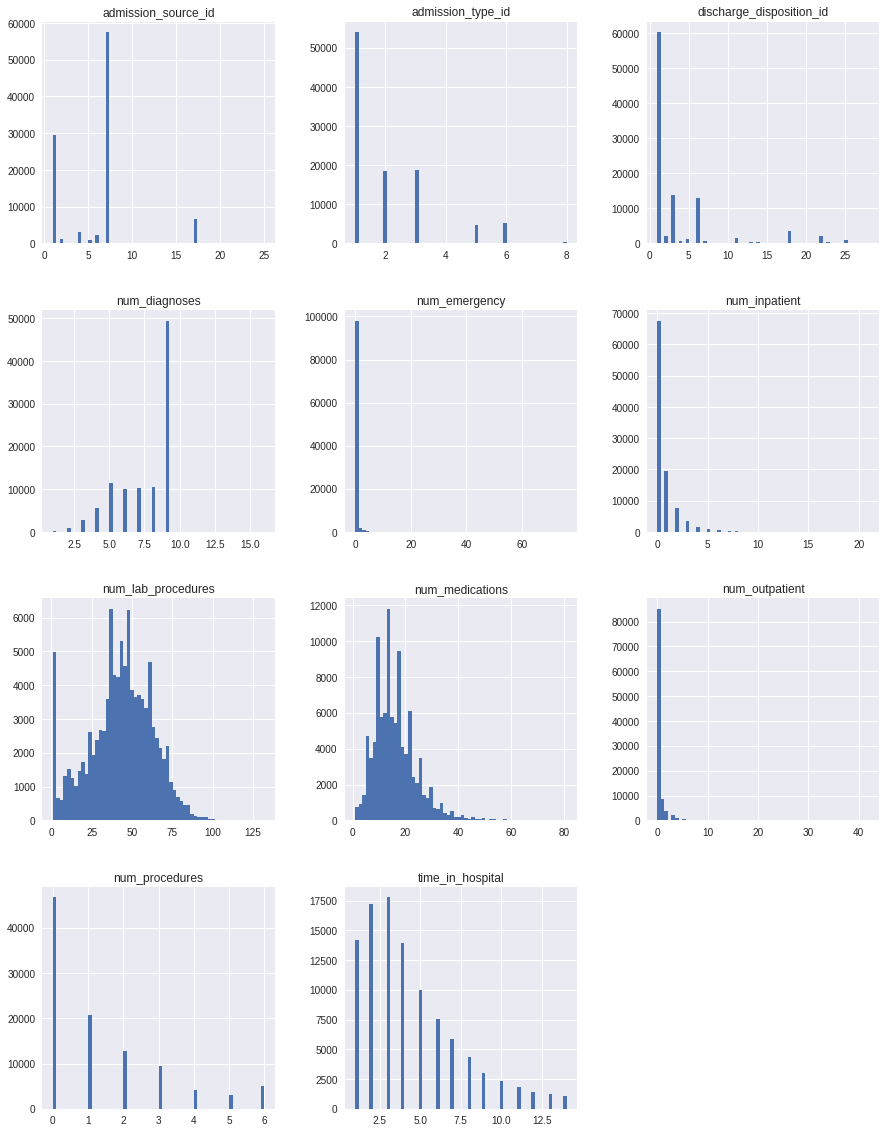

In [0]:
numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


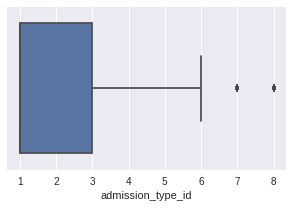

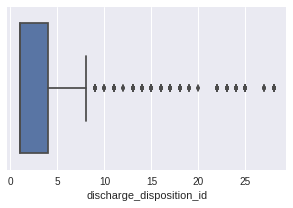

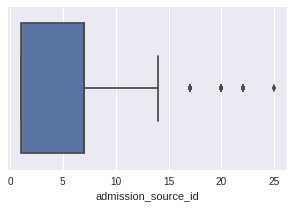

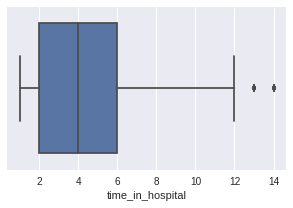

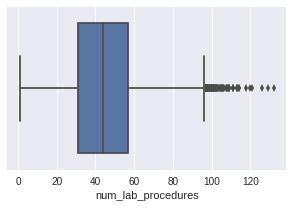

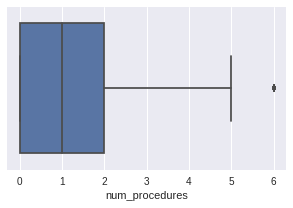

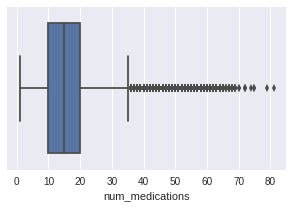

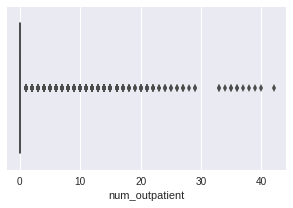

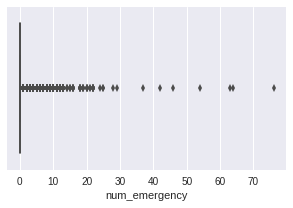

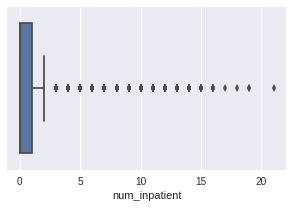

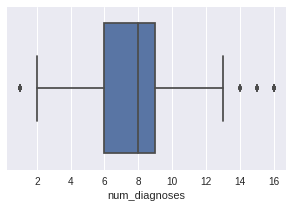

In [0]:
for i in numerical.columns:
  plt.figure(figsize = (5, 3))
  ax = sns.boxplot(x=i, data=diabetes_df)
  

In [0]:
#para las columnas num_emergency y num_outpatient se concentran todos en un mismo valor
#y en el resto de variables podriamos determinar que lo que esta fuera de lass colas son outlierss



### Crear variables dummy en caso que sea conveniente

In [0]:
diabetes_df["age"].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [0]:
# Creamos un df con los dummies
diabetes_df_age = pd.get_dummies(diabetes_df['age'])
# Y los concatenamos con nuestro dataframe
diabetes_df = pd.concat([diabetes_df, diabetes_df_age], axis=1)
diabetes_df
        

,encounter_id,cod_patient,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,1,0,0,0,0,0,0,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,0,1,0,0,0,0,0,0,0,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,0,0,1,0,0,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,0,0,0,1,0,0,0,0,0,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,0,0,0,0,1,0,0,0,0,0
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,0,0,0,0,0,1,0,0,0,0
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,0,0,0,0,0,0,1,0,0,0
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,0,0,0,0,0,0,0,1,0,0
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,0,0,0,0,0,0,0,0,1,0
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,0,0,0,0,0,0,0,0,0,1




### Estudiar que todas las variables ahora sí tengan el formato y contenido adecuado. si todavía no, arreglarlas.

In [0]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101766 entries, 0 to 101765
Data columns (total 63 columns):
encounter_id                101766 non-null object
cod_patient                 101766 non-null object
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
num_outpatient              101766 non-null int64
num_emergency               101766 non-null int64
num_inpatient               101766 n

In [0]:
#Sacamos el porcentaje de nulls por variable
diabetes_df.isnull().sum()/diabetes_df.shape[0] *100

encounter_id                0.000000 
cod_patient                 0.000000 
race                        2.233555 
gender                      0.000000 
age                         0.000000 
weight                      96.858479
admission_type_id           0.000000 
discharge_disposition_id    0.000000 
admission_source_id         0.000000 
time_in_hospital            0.000000 
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures          0.000000 
num_procedures              0.000000 
num_medications             0.000000 
num_outpatient              0.000000 
num_emergency               0.000000 
num_inpatient               0.000000 
diag_1                      0.020636 
diag_2                      0.351787 
diag_3                      1.398306 
num_diagnoses               0.000000 
max_glu_serum               0.000000 
a1cresult                   0.000000 
metformin                   0.000000 
repaglinide                 0.000000 
nateglinide 

In [0]:
#ahora vemos que las columnas race,weight(96%), metodo de pago 39 %, especialidad medica, un 49 %

In [0]:
#y vamos a ver tambien las que casi no varian, y son las que tienen el valor 1, por lo que son constantes  se podrian eliminar
# ademas como hemos comentado anteriormente podriamos eliminar las columnas admission_type_id,discharge_disposition_id,admission_source_id
# diabetes_df.drop('nombre_columna',axis=1,inplace=True)  




### Antes de estudiar el comportamiento de las variables, veremos si hay alguna variable derivada a crear

In [0]:
def encode_age(age):
    if age == "[0-10)":
        return 5
    elif age == "[10-20)":
        return 15
    elif age == "[20-30)":
        return 25
    elif age == "[30-40)":
        return 35
    elif age == "[40-50)":
        return 45
    elif age == "[50-60)":
        return 55
    elif age == "[60-70)":
        return 65
    elif age == "[70-80)":
        return 75
    elif age == "[80-90)":
        return 85
    elif age == "[90-100)":
        return 95
diabetes_df["age_num"] = diabetes_df["age"].apply(encode_age)
diabetes_df.T.head(55)



# Exploratory Data Analysis



### Crear la matriz de correlación

In [0]:
df_numerical_corr=numerical.corr()
df_numerical_corr

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_emergency,num_inpatient,num_diagnoses
admission_type_id,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126
discharge_disposition_id,0.083483,1.000000,0.018193,0.162748,0.023415,0.015921,0.108753,-0.008715,-0.024471,0.020787,0.046891
admission_source_id,0.106654,0.018193,1.000000,-0.006965,0.048885,-0.135400,-0.054533,0.027244,0.059892,0.036314,0.072114
time_in_hospital,-0.012500,0.162748,-0.006965,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,-0.143713,0.023415,0.048885,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,0.129888,0.015921,-0.135400,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.079535,0.108753,-0.054533,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
num_outpatient,0.026511,-0.008715,0.027244,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
num_emergency,-0.019116,-0.024471,0.059892,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539
num_inpatient,-0.038161,0.020787,0.036314,0.073623,0.039231,-0.066236,0.064194,0.107338,0.266559,1.000000,0.104710




### Pintar la matriz de correlación

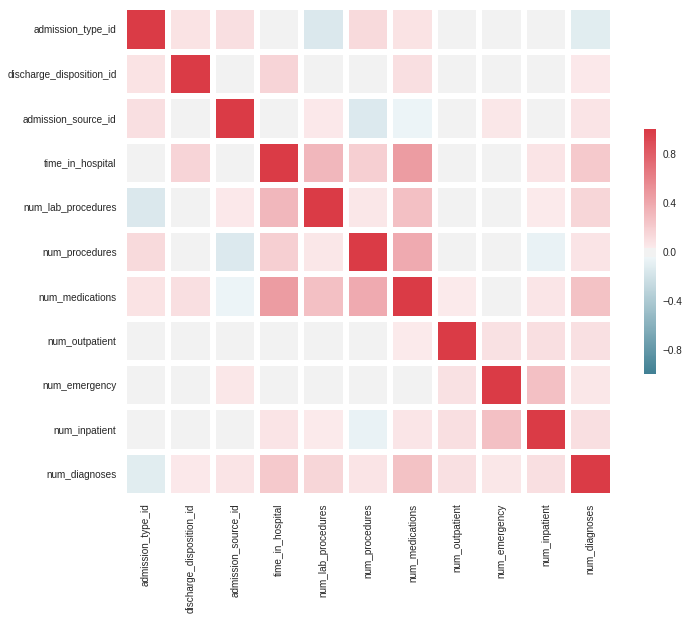

In [0]:
f, ax =plt.subplots(figsize=(11,9))
cmap =sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(numerical.corr(),cmap=cmap, center=0,square=True,linewidths=5,cbar_kws={"shrink":.5})



### Determinar qué par de variables están correlacionadas

In [0]:
# las variables que estan correlacionadas son time in hospital, con num_lab_procedures, con num_procedures y num_medications

In [0]:
corr_matrix = numerical.corr().abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack())
sol[sol > 0.3]

time_in_hospital  num_lab_procedures    0.318450
                  num_medications       0.466135
num_procedures    num_medications       0.385767
dtype: float64